In [15]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [2]:
yd=pd.read_csv('yield.csv')
yd = yd.rename(index=str, columns={"Value": "yield"})
yd = yd.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
yd.head()
yd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56717 entries, 0 to 56716
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Area    56717 non-null  object
 1   Item    56717 non-null  object
 2   Year    56717 non-null  int64 
 3   yield   56717 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [3]:
yr=pd.read_csv('rainfall.csv')
yr = yr.rename(index=str, columns={" Area": 'Area'})
yr['Avg_rain']=yr['average_rain_fall_mm_per_year'].fillna(0)
yr.drop(['average_rain_fall_mm_per_year'],axis=1)
print(yr.info())
yr.to_csv("rain1.csv", index=False)
yr.info()
yr.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
 3   Avg_rain                       6727 non-null   object
dtypes: int64(1), object(3)
memory usage: 262.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
 3   Avg_rain                       6727 non-null   object
dtypes: int64(1), object(3)
memor

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


In [4]:
df_rain1=pd.read_csv('rain1.csv')
df_rain1.info()
yield_df = pd.merge(yd, df_rain1, on=['Year','Area'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
 3   Avg_rain                       6727 non-null   object
dtypes: int64(1), object(3)
memory usage: 210.3+ KB


In [5]:
df_pes = pd.read_csv('pesticides.csv')
df_pes.head()
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides_tonnes"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [6]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19356 entries, 0 to 19355
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           19356 non-null  object 
 1   Item                           19356 non-null  object 
 2   Year                           19356 non-null  int64  
 3   yield                          19356 non-null  int64  
 4   average_rain_fall_mm_per_year  18955 non-null  object 
 5   Avg_rain                       19356 non-null  object 
 6   pesticides_tonnes              19356 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ MB


In [7]:
avg_temp=  pd.read_csv('temp.csv')
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()
avg_temp.dropna()
avg_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   Area      71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [8]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()
yield_df.groupby('Item').count()
yield_df['Area'].nunique()
yield_df.to_csv('yield_df.csv')
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28248 entries, 0 to 28247
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28248 non-null  object 
 1   Item                           28248 non-null  object 
 2   Year                           28248 non-null  int64  
 3   yield                          28248 non-null  int64  
 4   average_rain_fall_mm_per_year  28248 non-null  object 
 5   Avg_rain                       28248 non-null  object 
 6   pesticides_tonnes              28248 non-null  float64
 7   avg_temp                       28248 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
yield_df.isnull().sum()

Area                             0
Item                             0
Year                             0
yield                            0
average_rain_fall_mm_per_year    0
Avg_rain                         0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [10]:
yield_df.groupby('Item').count()

,Area,Year,yield,average_rain_fall_mm_per_year,Avg_rain,pesticides_tonnes,avg_temp
Item,,,,,,,
Cassava,2047,2047,2047,2047,2047,2047,2047
Maize,4123,4123,4123,4123,4123,4123,4123
Plantains and others,556,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223,3223
Sweet potatoes,2892,2892,2892,2892,2892,2892,2892
Wheat,3857,3857,3857,3857,3857,3857,3857


In [11]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

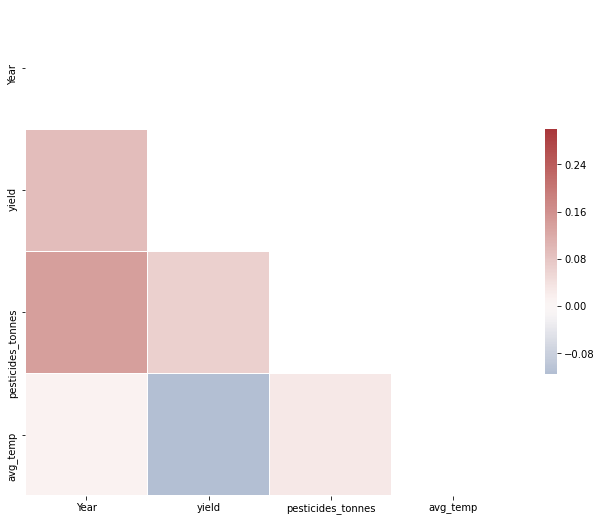

In [14]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.palette="vlag"


sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});